In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
politica_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EXTRA/Politica_Monetaria.xlsm - Tasa de Política Monetaria.csv')
inflacion_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/EXTRA/Inflacion_Chile.xlsm - Índice de precios al consumidor.csv')

In [23]:
if 'Date' not in politica_df.columns:
    politica_df = politica_df.rename(columns={'Fecha': 'Date'})
if 'Date' not in inflacion_df.columns:
    inflacion_df = inflacion_df.rename(columns={'Fecha': 'Date'})
merged_df = pd.merge(politica_df, inflacion_df, on='Date', how='inner')
merged_df.head()

,Date,TPM,IPC General,IPC sin volátiles
0,3/1/1997,NaN,6.78,7.18
1,4/1/1997,7.25,6.05,6.86
2,5/1/1997,NaN,5.44,5.97
3,6/1/1997,NaN,5.25,5.67
4,7/1/1997,6.75,5.58,5.60


In [33]:
## se rellenan los valores en blanco con el valor anteriror para poder visualizar mejor la grafica

merged_df['TPM'] = merged_df['TPM'].fillna(method='ffill')

<ipython-input-33-ec0a99c01a85>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df['TPM'] = merged_df['TPM'].fillna(method='ffill')


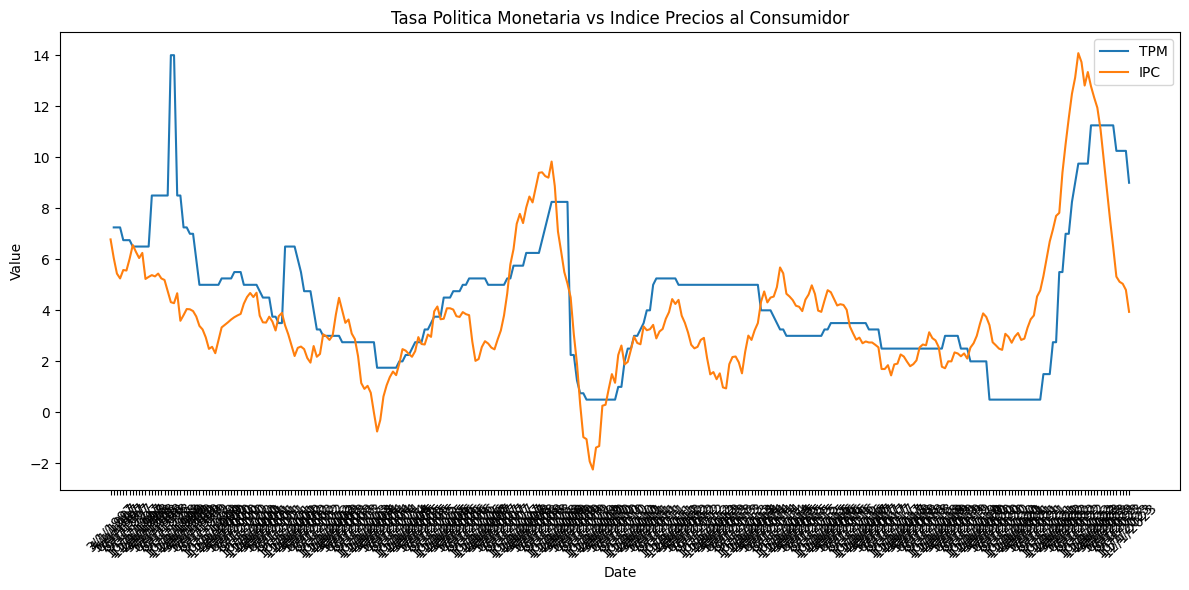

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['TPM'], label='TPM')
plt.plot(merged_df['Date'], merged_df['IPC General'], label='IPC')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Tasa Politica Monetaria vs Indice Precios al Consumidor')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


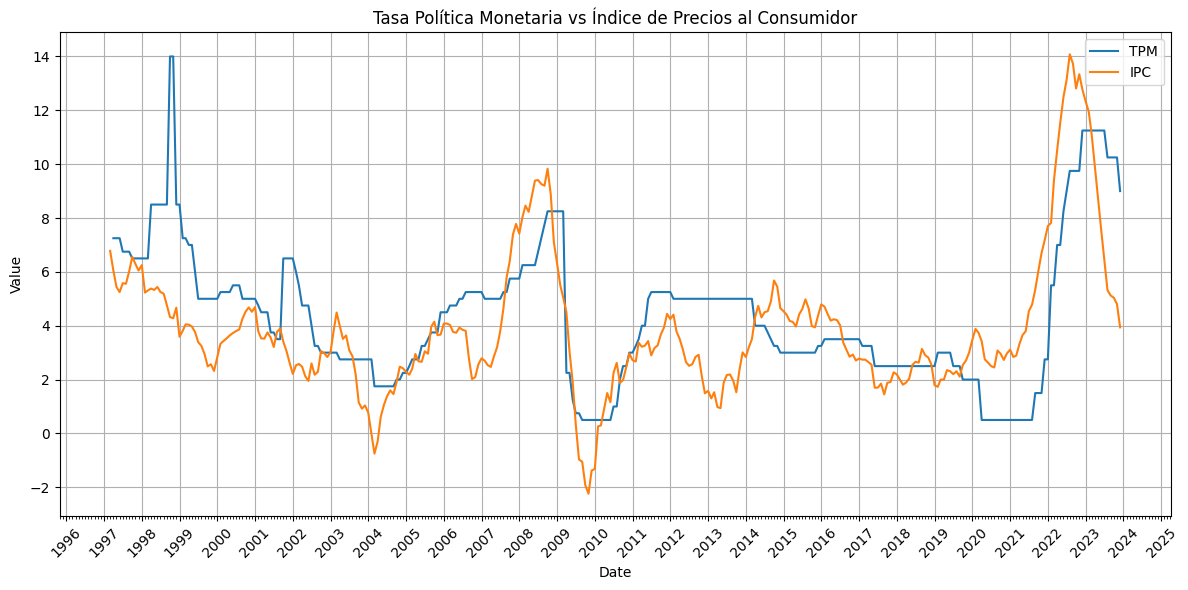

In [37]:
import matplotlib.dates as mdates

# Asegurar que 'Date' es de tipo datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['TPM'], label='TPM')
plt.plot(merged_df['Date'], merged_df['IPC General'], label='IPC')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Tasa Política Monetaria vs Índice de Precios al Consumidor')
plt.legend()

# Configurar el eje X para mostrar solo los años
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Ajustar el número de etiquetas si hay muchos años en el dataset
ax.xaxis.set_minor_locator(mdates.MonthLocator())

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()
